<html>
<head>
</head>
<body>
<h1>

Introducción al Data Science</h1>
    <div class="col s12 m4 l2 card-panel">
           <img src ="img/codehunterslab.png" height="150" width="150" align ="left"/>
    </div>
</body>

</html>

## Titanic :
> El RMS Titanic fue un transatlántico británico, el mayor barco del mundo al finalizar su construcción, que se hundió en la noche del 14 a la madrugada del 15 de abril de 1912 durante su viaje inaugural desde Southampton a Nueva York. En el hundimiento del Titanic murieron 1514 personas de las 2223 que iban a bordo, lo que convierte a esta tragedia en uno de los mayores naufragios de la historia ocurridos en tiempos de paz.

### Descripción de los datos:

- Variable	Definition	Key
- survival	Sobrevivio	0 = No, 1 = Si
- pclass	Ticket clase	1 = Primera Clase, 2 = Segunda Clase, 3 = Tercera Clas
- sex	Género de cada pasajero
- Age	Edad en Años	
- sibsp	# de Hermanos / Esposos a bordo del Titanic	
- parch	# de parientes / # de Niños abordo del Titanic	
- ticket	Número de ticket	
- fare	Tarifa Pagada	
- cabin	Número de Cabina	
- embarked	Puerto de Embarque


<img src="img/giphy.webp"/>

## Librerias que utilizaremos
 - `pandas` para el manejo de base de datos, archivos de texto plano, tablas sql.
 - `numpy` para realizar operaciones entre vectores y matrices.
 - `seaborn` es una libreria para realizar visualizaciones de forma muy simple y practica.
 - `scikit-learn` libreria para el prepocesado de datos, y realizar el entranamiento de modelos de algoritmos de aprendizaje supervisado y no supervisado.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## ¿Como cargar un archivo separado por comas?
>Usaremos la funcion de pandas ***read_csv()**.

>Recibe como parámetros:
- file: define la ruta completa desde donde se cargara el archivo
- sep: el separador de columnas pueden ser comas ',', tabs'\t', espacios en blanco ' ' entre otros más.
- header: definimos la lista de nombres o dejamos que tome la primera fila como los nombres.
- index_col: definimos que columna usaremos como identificador, este debe ser único. Si no se define pandas definira un identificador correlativo en orden ascendente 1,2,3,4,5...

>Retorna:
* Un objeto pandas.core.frame.Dataframe

>Mayor información de los parámetros:
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

>Otras funciones similares:
- read_excel() -> archivos Excel(.xls  .xlsx)
- read_table() -> archivos de Text(.txt)



In [2]:
train = pd.read_csv("Datasets/titanic/train_titanic.csv", sep=",", header ='infer', index_col=0)
test = pd.read_csv("Datasets/titanic/test_titanic.csv", sep=",", header ='infer', index_col=0)

## ¿Como se estructura un Dataframe?
> Es una estructura de dos dimensiones que puede contener columnas de ddiferentes tipos(enteros, categoricos, texto).
Podemos hacer referencia a un dataframe como una hoja de datos de excel o una tabla SQL.


In [3]:
train.head(4)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


<img src = "img/dataframe.jpg"  height="700" width="700"/>

In [4]:
train.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
           dtype='int64', name='PassengerId', length=891)

In [5]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### pandas.Series
is a one-dimensional labeled array capable of holding any data type 
(integers, strings, floating point numbers, Python objects, etc.).

In [6]:
train.Age.head()

PassengerId
1    22.0
2    38.0
3    26.0
4    35.0
5    35.0
Name: Age, dtype: float64

In [7]:
type(train.Age)

pandas.core.series.Series

In [8]:
type(train.Age.values)

numpy.ndarray

In [9]:
train.Age.values[0:5]

array([ 22.,  38.,  26.,  35.,  35.])

## Exploratory Data Analysis

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [11]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


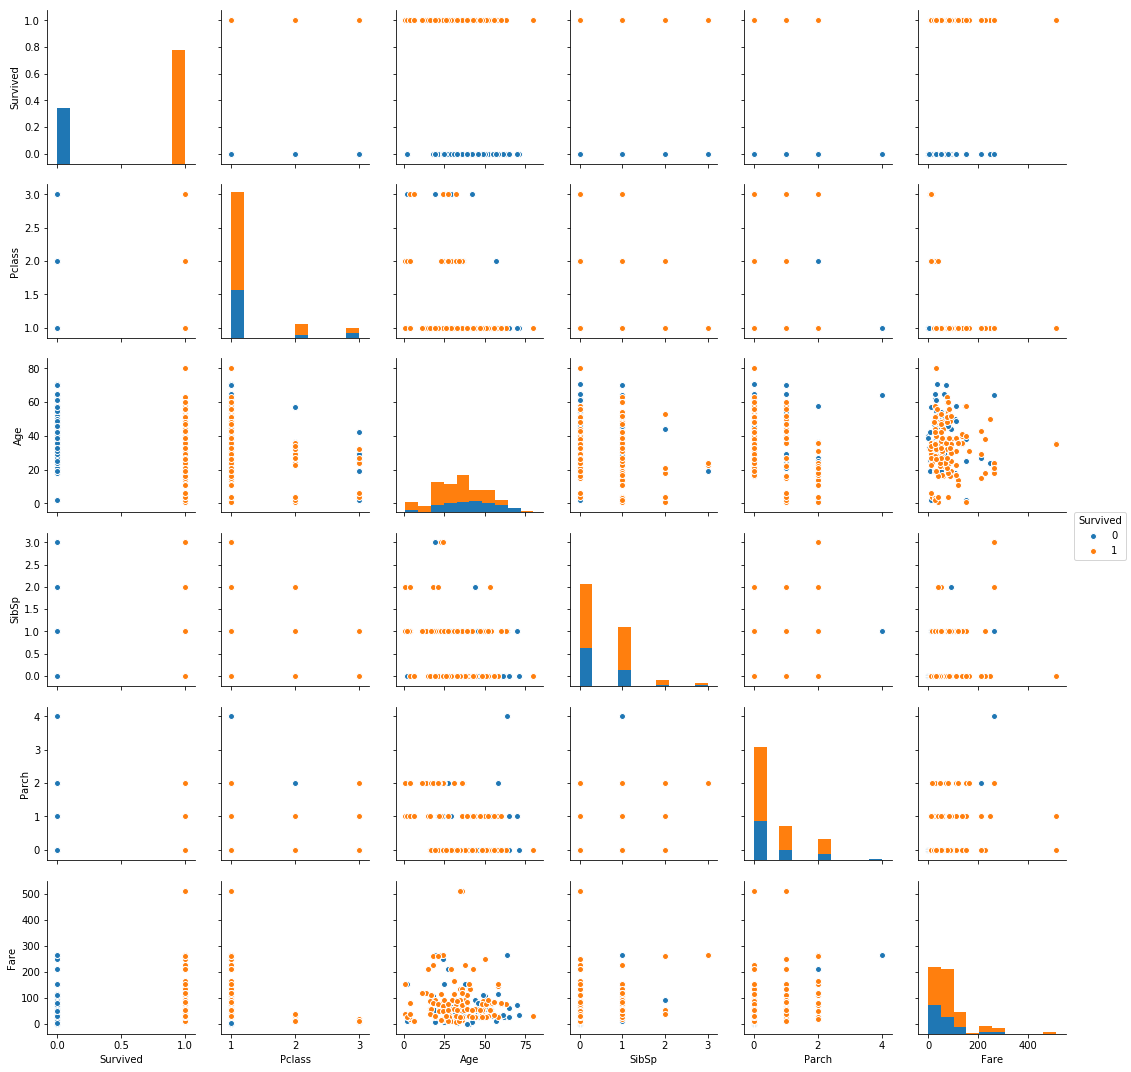

In [12]:
%matplotlib inline
plt.figure(figsize=(20,8))
g = sns.pairplot(train.drop("Name", axis = 1).dropna(), hue="Survived")
